## Business-related objective from this notebook would be to identify which images customer presents platform with in order to predict what the item is and then recommend articles of clothing for purchase.

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.0.0'

In [4]:
keras.__version__

'2.2.4-tf'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

Every one of the 60000 images in the dataset is represented by a 28 x 28 array.

In [8]:
X_train_full.dtype

dtype('uint8')

Fashion MNIST dataset is already split into training and test set. So need to make validation set.
Also, due to plans to use Gradient Descent to train NN, must scale input features.
For simplicity, will scale pixel intensities down to the 0-1 range by dividing them by 255.0, which converts them to floats.

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [13]:
class_names[y_train[0]] #y_train[0] = 4, y_train is full of class_names represented by numbers

'Coat'

Creating Model using Sequential API!

This is a MLP (Multilayer Perceptron) with 2 hidden layers.

In [15]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]), 
                                 keras.layers.Dense(300, activation="relu"), 
                                 keras.layers.Dense(100, activation="relu"),
                                 keras.layers.Dense(10, activation="softmax")])

In [16]:
model.summary()#None means batch size can be anything

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = 'sgd', metrics = ["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 11s 194us/sample - loss: 0.7214 - accuracy: 0.7660 - val_loss: 0.5096 - val_accuracy: 0.8246
Epoch 2/30
55000/55000 [==============================] - 9s 156us/sample - loss: 0.4899 - accuracy: 0.8298 - val_loss: 0.4524 - val_accuracy: 0.8392
Epoch 3/30
55000/55000 [==============================] - 9s 157us/sample - loss: 0.4447 - accuracy: 0.8445 - val_loss: 0.4150 - val_accuracy: 0.8622
Epoch 4/30
55000/55000 [==============================] - 9s 159us/sample - loss: 0.4149 - accuracy: 0.8553 - val_loss: 0.4019 - val_accuracy: 0.8630
Epoch 5/30
55000/55000 [==============================] - 9s 158us/sample - loss: 0.3939 - accuracy: 0.8615 - val_loss: 0.4097 - val_accuracy: 0.8594
Epoch 6/30
55000/55000 [==============================] - 9s 159us/sample - loss: 0.3782 - accuracy: 0.8661 - val_loss: 0.3817 - val_accuracy: 0.8718
Epoch 7/30
55000/55000 [==========================

We can see from here that with each subsequent epoch, training loss and validation loss decreases as well as increasing training accuracy and validation accuracy. Training and validation accuracies are close. So there does not seem to be much overfitting happening. 

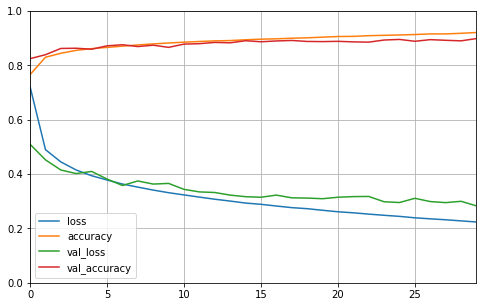

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set vertical range to [0-1]
plt.show()

Learning curves: Mean training loss, mean validation loss, mean training accuracy and mean validation accuracy trends over 30 epochs.
Some good things to note:
    1. loss decreases over time
    2. accuracy increases over time
    3. validation curves are close to training curves which means there is not too much overfitting on training set
    4. in the beginnning of training, validation set seems to do better than training, but what actually is happening is that validation error is computed at end of each epoch. Training error though is computed using a running mean *during* each epoch. So to have a right comparison, training curve should be shifted half an epoch to the left. When this is done, validation and training accuracies nearly overlap.

Let us try and run fit() again on our model in order to try and see if validation loss will converge since it is still going down. To do this, just need to run fit() again on model.

In [22]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 164us/sample - loss: 0.2207 - accuracy: 0.9202 - val_loss: 0.2956 - val_accuracy: 0.8942
Epoch 2/30
55000/55000 [==============================] - 9s 157us/sample - loss: 0.2163 - accuracy: 0.9219 - val_loss: 0.2880 - val_accuracy: 0.8972
Epoch 3/30
55000/55000 [==============================] - 9s 157us/sample - loss: 0.2137 - accuracy: 0.9233 - val_loss: 0.2932 - val_accuracy: 0.8946
Epoch 4/30
55000/55000 [==============================] - 9s 158us/sample - loss: 0.2094 - accuracy: 0.9248 - val_loss: 0.2894 - val_accuracy: 0.8990
Epoch 5/30
55000/55000 [==============================] - 9s 157us/sample - loss: 0.2057 - accuracy: 0.9264 - val_loss: 0.3038 - val_accuracy: 0.8890
Epoch 6/30
55000/55000 [==============================] - 9s 156us/sample - loss: 0.2022 - accuracy: 0.9278 - val_loss: 0.2943 - val_accuracy: 0.8952
Epoch 7/30
55000/55000 [===========================

Let's graph training and validation loss and accuracies again to see overall trends.

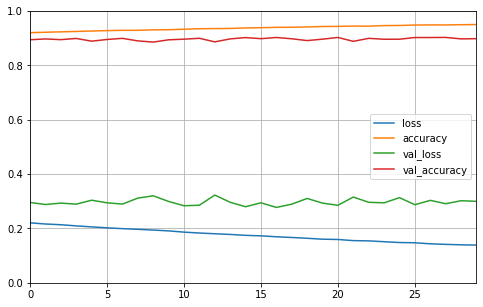

In [23]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #set vertical range to [0-1]
plt.show()

Awesome! We met the reason for running fit() again. Validation loss has discontinued dropping. 

If further not satisfied with performance of model, could further tune model training in these ways in the following order:
    1. hyperparameters 
        a. learning rate
        b. optimizer
    2. model hyperparameters
        a. # layers
        b. # neurons per layer
        c. types of activation functions to use for each hidden layer
        d. batch size

For now, satisfied with model's performance. So will run it on test set to evaluate model's performance.

In [24]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[68.94101811219454, 0.8621]

It is common to get slightly lower performance on test set than on validation set since hyperparameters are trained on validation set. 

Due to test accuracy not being that far off from validation accuracy and even training accuracy, will now run predict() method. We can make predictions on new instances. This would be in theory. In our case, there are no new instances, so we will run prediction() on first three instances of the test set.

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

We can see here that there is strong belief in what each image represents. For each instance, model estimates a probability per class (0-9). For example, first row is first image's probability breakdown per class. It is 0% for each class except the last one, which is class 9. In second row, the model predicted the image to fall within class 2 100%. Last image/row has 100% belief that image is class 1.

Instead of probabilities, predictions can be output as classes that had highest probability instead of seeing probability breakdown. predict_classes() is used.

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [28]:
import numpy as np
#See what images numbers represent:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

Finally, we can compare this with our source of truth, which is the y-values from the original test set (y_test values).

In [29]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Yes! The model predicted accurately fashion images. This sort of image recognition could be used in the business sense when a customer presents business with desires article of clothing. This articles of clothing can be transformed into an image and then classified using this model. This can then be used in conjunction with a recommendation system that show the customer suggested articles of clothing they may be interested in buying.